In [15]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
%matplotlib inline
import matplotlib.pyplot as plt


In [17]:
#loading the csv file
dataset=pd.read_csv('./input/netflix_titles.csv')

In [3]:
#finding the shape of the dataset rows, cloumns
dataset.shape

(8807, 12)

In [4]:
#displaying the column names 
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#finding the unique values
dataset.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
#statistics
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#cleaning the data
#to check whether null values are present
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

,release_year
release_year,1.0


<AxesSubplot:>

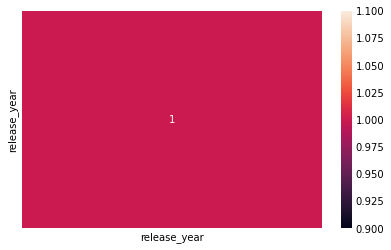

In [9]:
#plotting the correlation in the dataset
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

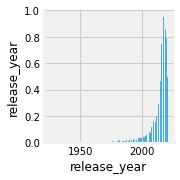

In [18]:
#visualization for seeing the correlation
sns.pairplot(dataset)

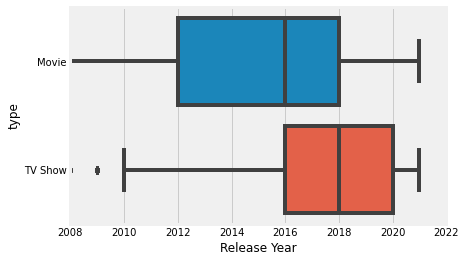

In [19]:
sns.boxplot(data = dataset, x ='release_year' ,y='type')
plt.xlabel('Release Year')
plt.xlim(2008,2022)
plt.savefig('Trend_over_year.jpg')
plt.show()

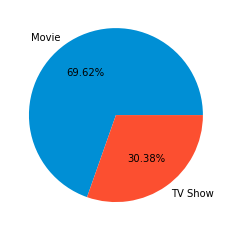

In [20]:
type_value_count = dataset['type'].value_counts(normalize=True)*100
content_types = dataset['type'].unique()
plt.pie(type_value_count,labels=content_types,autopct='%1.2f%%')
plt.savefig('contribution.jpg')
plt.show()

In [21]:
bar_plot_data(dataset, "rating", "Netflix movie ratings")

NameError: name 'bar_plot_data' is not defined

In [ ]:
dataset_filter = dataset["release_year"].value_counts().rename_axis("release_year").reset_index(name='count')
bar_plot_data_v2(dataset_filter,  {"y": "count", "x": "release_year"}, "Release year", (22, 5), top_filter=1000, inverted_x=True)

In [ ]:
bar_plot_data(dataset, "director", "Directors")

In [ ]:
bar_plot_data(dataset, "country", "Countries")

In [ ]:
#Exploration
#Total cases versus Active cases
sns.relplot(x = 'country', y ='rating',hue = 'director', data = dataset)

In [ ]:
#Full dataset exploration
dataset.style.background_gradient(cmap="Blues")

In [ ]:
#Visulaisation
plt.figure(figsize=(17,6))
plots = sns.barplot(x= dataset['country'],y= dataset['rating'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
#Distribution Plot
total_rating= np.array(dataset['rating'])
print(total_cases)

sns.distplot(np.log(dataset['ratings']), kde=True)
plt.title("Distribution of ratings")
plt.show